In [344]:
import numpy as np

In [345]:
import pandas as pd

In [346]:
import sklearn as skl

In [347]:
import seaborn as sns

In [348]:
import matplotlib.pyplot as plt

In [349]:
df = pd.read_csv("Jowar.csv")

In [350]:
df.head(1)

,Month,Year,Rainfall,WPI
0,4,2012,47.5,98.3


In [351]:
df.head()

,Month,Year,Rainfall,WPI
0,4,2012,47.5,98.3
1,5,2012,31.7,98.2
2,6,2012,117.8,97.0
3,7,2012,250.2,93.7
4,8,2012,262.4,96.2


In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Month     81 non-null     int64  
 1   Year      81 non-null     int64  
 2   Rainfall  81 non-null     float64
 3   WPI       81 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.7 KB


In [353]:
plt.figure(figsize=(15, 8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

In [354]:
data = df.copy()
corr_matrix = data.corr()
corr_matrix['WPI'].sort_values(ascending=False)

WPI         1.000000
Year        0.855319
Month       0.019256
Rainfall   -0.070675
Name: WPI, dtype: float64

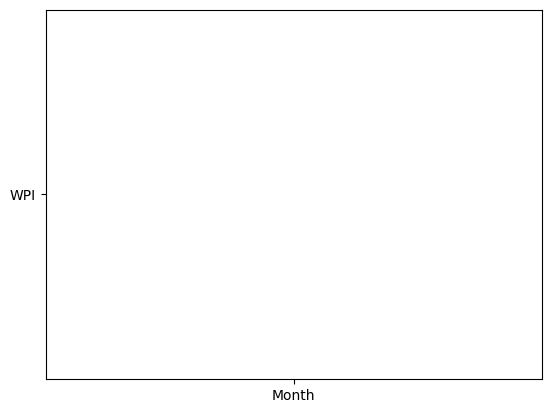

In [355]:
plt.plot(['Month'], ['WPI'])

In [356]:
df.describe()

,Month,Year,Rainfall,WPI
count,81.000000,81.000000,81.000000,81.000000
mean,6.666667,2015.111111,97.571605,113.837037
std,3.420526,1.962142,92.680481,11.766419
min,1.000000,2012.000000,6.700000,93.700000
25%,4.000000,2013.000000,22.800000,101.700000
50%,7.000000,2015.000000,57.800000,115.800000
75%,10.000000,2017.000000,171.500000,121.300000
max,12.000000,2018.000000,310.000000,142.300000


In [357]:
len(df['Year'].unique())

7

In [358]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:] 
    return data.iloc[train_indices], data.iloc[test_indices]

In [359]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(df, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 64
Rows in test set: 17



<Axes: xlabel='Month', ylabel='WPI'>

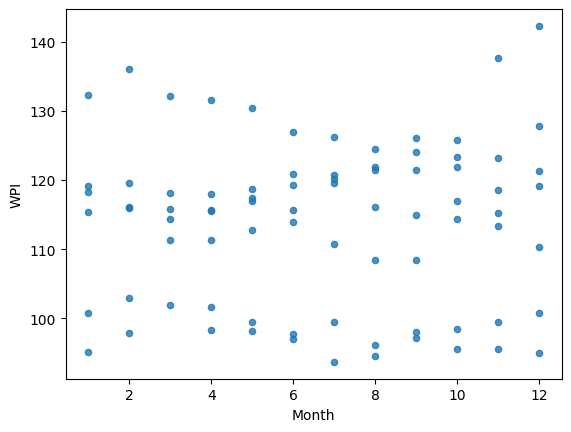

In [360]:
df.plot(kind="scatter", x="Month", y="WPI", alpha=0.8)

<Axes: xlabel='Rainfall', ylabel='WPI'>

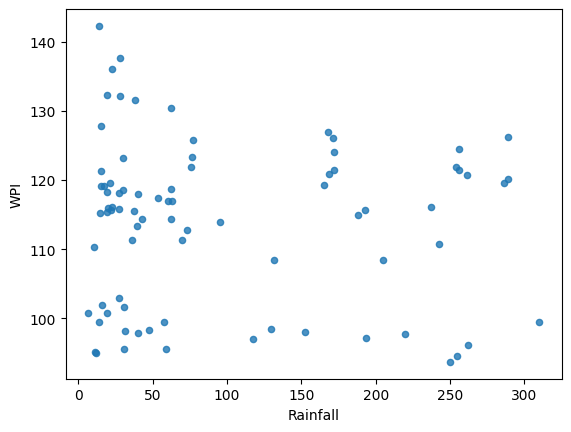

In [361]:
df.plot(kind="scatter", x="Rainfall", y="WPI", alpha=0.8)

<Axes: xlabel='WPI', ylabel='Rainfall'>

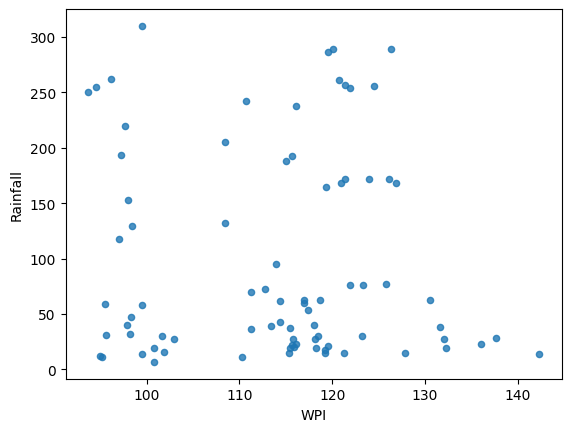

In [362]:
df.plot(kind="scatter", x="WPI", y="Rainfall", alpha=0.8)

<Axes: xlabel='Year', ylabel='WPI'>

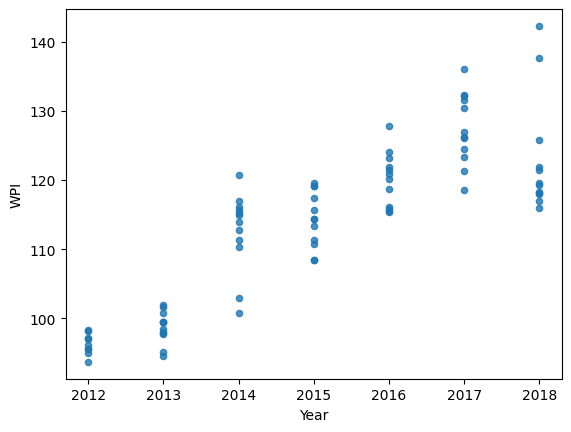

In [363]:
df.plot(kind="scatter", x="Year", y="WPI", alpha=0.8)

<Axes: xlabel='Year', ylabel='Rainfall'>

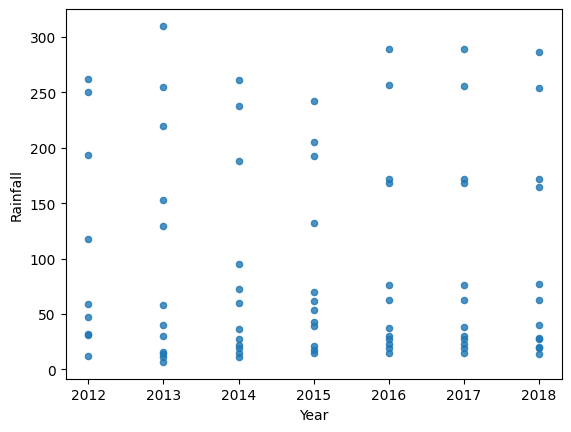

In [364]:
df.plot(kind="scatter", x="Year", y="Rainfall", alpha=0.8)

<Axes: xlabel='Month', ylabel='Rainfall'>

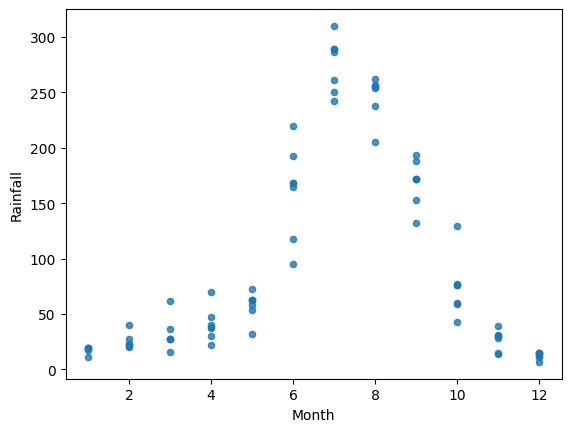

In [365]:
df.plot(kind="scatter", x="Month", y="Rainfall", alpha=0.8)

In [366]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(df)

SimpleImputer(strategy='median')

In [367]:
X = imputer.transform(df)

In [368]:
df_tr = pd.DataFrame(X, columns=df.columns)

In [369]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [370]:
df_labels = df["WPI"].copy()

In [371]:
df = df.drop("WPI",axis=1)

In [372]:
df_num_tr = my_pipeline.fit_transform(df)

In [373]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(df_num_tr, df_labels)

RandomForestRegressor()

In [374]:
some_data = df.iloc[:5]

In [375]:
print(some_data)

   Month  Year  Rainfall
0      4  2012      47.5
1      5  2012      31.7
2      6  2012     117.8
3      7  2012     250.2
4      8  2012     262.4


In [376]:
some_labels = df_labels.iloc[:5]

In [377]:
prepared_data = my_pipeline.transform(some_data)

##Predicted data

In [378]:
model.predict(prepared_data)

array([98.101, 98.081, 96.66 , 94.42 , 95.508])

In [379]:
print(prepared_data)

[[-0.78446454 -1.59544807 -0.54362666]
 [-0.49029034 -1.59544807 -0.71516703]
 [-0.19611614 -1.59544807  0.21961938]
 [ 0.09805807 -1.59544807  1.65708419]
 [ 0.39223227 -1.59544807  1.78953941]]


##Original Data

In [380]:
list(some_labels)

[98.3, 98.2, 97.0, 93.7, 96.2]

In [381]:
from sklearn.metrics import mean_squared_error
df_predictions = model.predict(df_num_tr)
mse = mean_squared_error(df_labels, df_predictions)
rmse = np.sqrt(mse)

In [382]:
rmse

2.029185258869861

In [383]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, df_num_tr, df_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [384]:
rmse_scores

array([ 2.85603486,  2.42135701,  8.61267996,  5.66241312,  8.1846455 ,
        9.32869188,  7.88330792, 13.20330637, 11.92748673, 10.42395414])

In [385]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [386]:
print_scores(rmse_scores)

Scores: [ 2.85603486  2.42135701  8.61267996  5.66241312  8.1846455   9.32869188
  7.88330792 13.20330637 11.92748673 10.42395414]
Mean:  8.050387748916027
Standard deviation:  3.3702250801265654


In [387]:
X_test = df
Y_test = df_labels
X_test_prepared = my_pipeline.transform(df)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [388]:
final_rmse

2.029185258869861

In [389]:
from joblib import dump, load
dump(model, 'jowar.joblib') 

['jowar.joblib']

In [390]:
prepared_data = my_pipeline.transform([[9,2020,167.9]])

C:\Users\omkar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [391]:
from joblib import dump, load
import numpy as np
model = load('jowar.joblib') 
features = np.array(prepared_data)
model.predict(features)

array([123.096])

In [392]:
import pickle
pickle.dump(model,open('dtr.pkl','wb'))
pickle.dump(my_pipeline,open('preprocessor.pkl','wb'))